### Target: FNGU - Tech, [HMMJ](https://www.horizonsetfs.com/horizons/media/pdfs/productsheets/HMMJ-Product-Sheet.pdf) - Weed stonks, or [XEG](https://www.blackrock.com/ca/investors/en/products/239839/ishares-sptsx-capped-energy-index-etf) - Candian OIL

Network stuff

In [4]:
# Importing the libraries
import numpy as np
import pandas as pd


# !pip install yfinance networkx
import yfinance as yf
import networkx as nx


from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

import datetime

import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

# Control the default size of figures in this Jupyter notebook
%pylab inline
pylab.rcParams['figure.figsize'] = (12, 6)   # Change the size of plots
plt.style.use('fivethirtyeight')  
  
  
start = datetime.datetime(2016,1,1)
# start = datetime.datetime(2018, 2, 1)
# end = datetime.datetime(2020, 9, 13)
end = datetime.date.today()

Populating the interactive namespace from numpy and matplotlib


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%********

<AxesSubplot:xlabel='Date'>

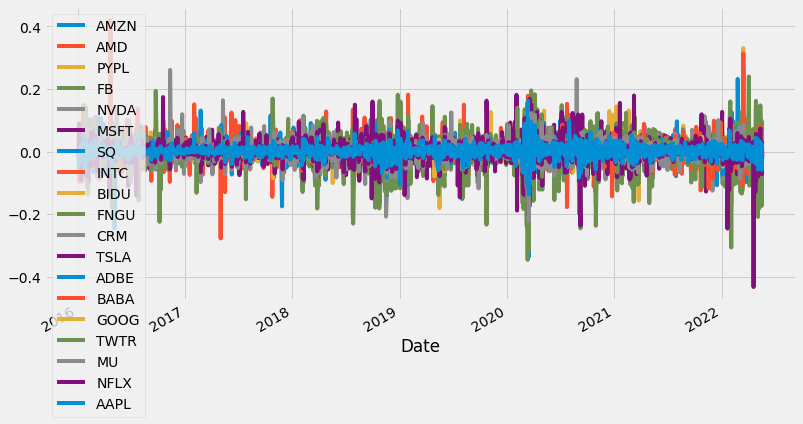

In [6]:
USE_LOG_RETURN = True

# ls = ['HMMJ,'ogi','hexo','cweb','smg','apha','gwprf','tlry','acb','cron','weed.TO'] # ,'weed'
# ls = ['XEG.to', 'SU.to','CNQ.to','CVE.to','TOU.to','IMO.to', ,'PXT.to','CPG.to','PSK.to','ARX.to','WCP.to'] # 'PXT.to' and after are less weighted in XEG - which is market cap weighted
ls = ['AAPL','NFLX','GOOG','FB','AMZN','BABA','BIDU','NVDA','TSLA','TWTR','FNGU', 'MSFT'] # FNGU ETF
ls.extend(['ADBE', 'AMD', 'AMZN', 'CRM', 'INTC', 'MSFT', 'MU', 'NFLX', 'PYPL', 'SQ']) # BULZ ETF
ls  = list(set(ls))


data = {} 

for i in ls:
  arry= yf.download(i, start, end)

  if USE_LOG_RETURN:
    data[i] =  pd.Series(np.diff(np.log(arry["Adj Close"])), index=arry.index[1:])
  else:
    data[i] = arry["Adj Close"]

stocks = pd.DataFrame(data)

# stocks=stocks.dropna()
stocks.plot(grid = True)

In [7]:
# np.sum(stocks.isna())
stocks.shape
stocks.dropna(inplace=True)
stocks.shape
stocks.head(5)

(1606, 19)

(1089, 19)

,AMZN,AMD,PYPL,FB,NVDA,MSFT,SQ,INTC,BIDU,FNGU,CRM,TSLA,ADBE,BABA,GOOG,TWTR,MU,NFLX,AAPL
Date,,,,,,,,,,,,,,,,,,,
2018-01-24,-0.003698,-0.017934,-0.005955,-0.014898,-0.013103,-0.000871,-0.015449,-0.012013,0.002367,-0.002056,-0.003450,-0.019752,-0.011612,0.016761,-0.004910,-0.016844,-0.019994,0.043049,-0.016057
2018-01-25,0.014945,-0.023887,0.007498,0.004973,0.002330,0.005539,0.017890,-0.004625,-0.014919,-0.000749,-0.007918,-0.024141,-0.001366,0.014219,0.005251,-0.009432,-0.001626,0.031641,-0.018012
2018-01-26,0.017339,0.042593,0.013075,0.013352,0.029105,0.018563,0.018663,0.100315,0.023757,0.079351,0.015422,0.015313,0.019007,0.034150,0.004663,0.090952,0.015229,0.018005,0.002335
2018-01-29,0.011086,0.028171,-0.013431,-0.021385,0.014362,-0.001490,-0.011816,-0.001999,-0.025372,0.016980,-0.003524,0.019296,-0.015368,-0.010827,-0.000221,0.036809,-0.008740,0.035734,-0.020916
2018-01-30,0.014106,-0.034368,-0.006306,0.006111,-0.016872,-0.012643,0.001979,-0.024098,-0.038816,-0.028462,-0.009489,-0.010671,-0.006732,-0.016639,-0.010166,0.017323,-0.038140,-0.020555,-0.005912


In [8]:
if not USE_LOG_RETURN:
    roi = (stocks.iloc[-1] - stocks.iloc[1])/stocks.iloc[1]
    roi = round(roi*100)
    roi = pd.DataFrame(roi)
    roi.transpose()
    roi.plot.bar()

<AxesSubplot:xlabel='Date'>

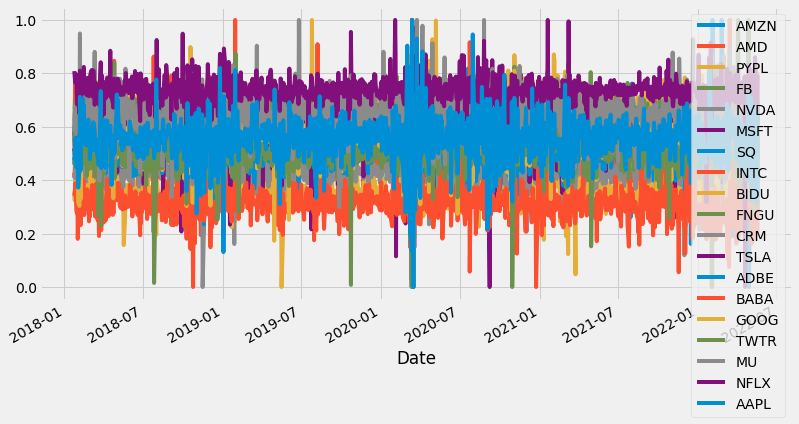

In [9]:
def normIt(df):
  # mean norm  # normalized_df=(df-df.mean())/df.std()
   return (df-df.min())/(df.max()-df.min()) 

stocks_norm = normIt(stocks)
stocks_norm.plot()

# Selecting the most correlated


In [10]:
from scipy.stats import spearmanr
stocks_norm_spearmanr = pd.DataFrame(spearmanr(stocks_norm)[0], columns=stocks.columns, index=stocks.columns)
stocks_norm_spearmanr_cumSum = stocks_norm_spearmanr.cumsum()
stocks_norm_spearmanr_cumSum

,AMZN,AMD,PYPL,FB,NVDA,MSFT,SQ,INTC,BIDU,FNGU,CRM,TSLA,ADBE,BABA,GOOG,TWTR,MU,NFLX,AAPL
AMZN,1.000000,0.541923,0.625558,0.624853,0.624292,0.695120,0.577580,0.492931,0.455803,0.757616,0.618062,0.408807,0.677299,0.477919,0.687036,0.459208,0.477282,0.622585,0.647242
AMD,1.541923,1.541923,1.145175,1.107293,1.338335,1.247967,1.107905,0.988081,0.838842,1.389669,1.134078,0.821137,1.241916,0.856011,1.190257,0.861589,1.021113,1.088981,1.158032
PYPL,2.167481,2.061540,2.145175,1.715330,1.953682,1.929730,1.799362,1.497059,1.297425,2.084466,1.806563,1.213263,1.946241,1.330961,1.803811,1.379325,1.470174,1.628268,1.746443
FB,2.792334,2.543980,2.753212,2.715330,2.512675,2.554447,2.302311,1.960141,1.724914,2.812566,2.359745,1.571781,2.572322,1.789194,2.515584,1.933866,1.922794,2.162679,2.325029
NVDA,3.416626,3.258023,3.368558,3.274323,3.512675,3.218309,2.908212,2.584216,2.180834,3.579866,2.964844,2.025663,3.242164,2.247417,3.130734,2.399956,2.551690,2.698414,2.948374
MSFT,4.111746,3.810870,4.050322,3.899040,4.176537,4.218309,3.477819,3.158052,2.639902,4.306527,3.676467,2.442352,4.032134,2.713423,3.881508,2.867152,3.068831,3.259431,3.655213
SQ,4.689326,4.341196,4.741779,4.401988,4.782439,4.787916,4.477819,3.574527,3.127246,4.984038,4.296558,2.870101,4.665770,3.169388,4.400767,3.394762,3.532184,3.772989,4.166588
INTC,5.182257,4.836345,5.250757,4.865070,5.406513,5.361752,4.894294,4.574527,3.540936,5.590511,4.759310,3.270663,5.184102,3.582292,4.953783,3.787725,4.186601,4.208689,4.727540
BIDU,5.638060,5.219384,5.709340,5.292559,5.862433,5.820820,5.381639,4.988217,4.540936,6.277911,5.217657,3.631335,5.653025,4.257535,5.427085,4.231793,4.614616,4.626598,5.172769
FNGU,6.395676,5.851437,6.404137,6.020659,6.629733,6.547481,6.059150,5.594690,5.228336,7.277911,5.897796,4.278250,6.388595,4.932670,6.170492,4.891559,5.194608,5.316129,5.904611


In [11]:
corrwith = stocks_norm.corr()
corr_cumSum = corrwith.cumsum()
corr_cumSum

,AMZN,AMD,PYPL,FB,NVDA,MSFT,SQ,INTC,BIDU,FNGU,CRM,TSLA,ADBE,BABA,GOOG,TWTR,MU,NFLX,AAPL
AMZN,1.000000,0.543030,0.586353,0.610754,0.637495,0.708464,0.591521,0.472171,0.390786,0.770707,0.628625,0.413050,0.682618,0.432960,0.667882,0.413487,0.478563,0.594369,0.644564
AMD,1.543030,1.543030,1.051966,1.043250,1.335818,1.275044,1.109133,0.907982,0.747351,1.399172,1.136724,0.813579,1.241456,0.793040,1.185933,0.738662,1.017156,1.014898,1.188280
PYPL,2.129383,2.008642,2.051966,1.626658,1.935604,1.936715,1.810477,1.393082,1.162784,2.085946,1.770949,1.232996,1.908634,1.243496,1.761319,1.183443,1.487192,1.521106,1.782794
FB,2.740137,2.441139,2.635373,2.626658,2.501148,2.560564,2.339115,1.839987,1.530083,2.809249,2.353385,1.573556,2.524836,1.649497,2.428454,1.657560,1.942994,2.021653,2.364113
NVDA,3.377632,3.139461,3.235159,3.192201,3.501148,3.275749,2.979970,2.428333,1.948503,3.590012,2.975142,2.033214,3.218263,2.092387,3.082448,2.088798,2.589003,2.514048,3.021490
MSFT,4.086097,3.706040,3.896831,3.816050,4.216333,4.275749,3.597747,3.054613,2.364762,4.371923,3.706492,2.502481,4.043539,2.541932,3.875922,2.553223,3.174960,3.029450,3.787220
SQ,4.677618,4.223652,4.598176,4.344687,4.857188,4.893525,4.597747,3.505962,2.841474,5.084732,4.329594,2.960515,4.690454,3.011847,4.430045,3.037001,3.686380,3.537039,4.341410
INTC,5.149790,4.659463,5.083275,4.791593,5.445534,5.519805,5.049096,4.505962,3.195998,5.670545,4.798508,3.330253,5.242753,3.382908,4.990058,3.424709,4.316535,3.900946,4.914206
BIDU,5.540576,5.016027,5.498708,5.158892,5.863954,5.936064,5.525808,4.860487,4.195998,6.330105,5.196353,3.690486,5.669642,4.059722,5.412259,3.783611,4.734263,4.254324,5.324265
FNGU,6.311283,5.644492,6.185482,5.882195,6.644717,6.717976,6.238617,5.446301,4.855558,7.330105,5.903629,4.369431,6.435082,4.725236,6.184381,4.408041,5.349542,4.924244,6.091603


In [124]:
stocks_norm_spearmanr_cumSum.sort_values("MSFT", inplace=True, axis=1)
top_N = stocks.columns.shape[0] // 3

keepThese = stocks_norm_spearmanr_cumSum.iloc[:, -top_N:]

keepThese = keepThese.columns
if "FNGU" not in keepThese:
#   keepThese.append("FNGU")
    keepThese.append(pd.Index(["FNGU"]))
keepThese = keepThese.to_numpy()

# corr = stocks_norm_spearmanr[keepThese].round(2) # all rows 
corr = stocks_norm_spearmanr.loc[keepThese, keepThese].round(2) # only row the index rows
corr 

,ADBE,PYPL,AMZN,NVDA,MSFT,FNGU
ADBE,1.00,0.70,0.68,0.67,0.79,0.74
PYPL,0.70,1.00,0.63,0.62,0.68,0.69
AMZN,0.68,0.63,1.00,0.62,0.70,0.76
NVDA,0.67,0.62,0.62,1.00,0.66,0.77
MSFT,0.79,0.68,0.70,0.66,1.00,0.73
FNGU,0.74,0.69,0.76,0.77,0.73,1.00


In [125]:
# corr.cumsum() # shows which are the most correlated with each other. This is illustated in `nx.draw_spectral(graph, with_labels=True)`

(<Figure size 432x432 with 1 Axes>, <AxesSubplot:>)

Text(0.5, 0.98, 'Correlation Matrix')

<AxesSubplot:>

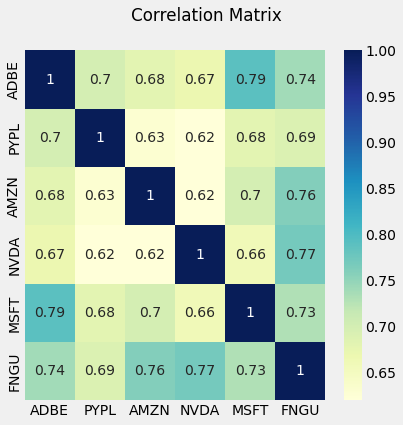

In [126]:
plt.subplots(figsize=(6,6))
plt.suptitle("Correlation Matrix")
sns.heatmap(corr, annot=True, cmap="YlGnBu")

In [268]:
corr_mat = np.matrix(corr, dtype=None)

graph = nx.from_numpy_matrix(corr_mat)
mapping = lambda i: keepThese[i]

graph = nx.relabel_nodes(graph, mapping)

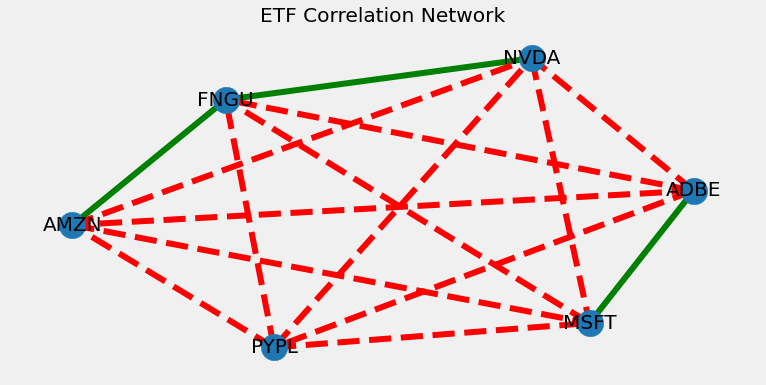

In [269]:
# pos_corr_mat = np.where(corr_mat >= avg, corr_mat, 0)
avg = corr_mat.flatten()
avg = avg[avg.nonzero()]
avg = np.average(avg)


_=plt.title("ETF Correlation Network")

# G=nx.Graph()
G=graph

for i in range(len(corr_mat)):
  for j in range(len(corr_mat)):
    if i!=j: # doesnt work.... 
      if np.abs(corr_mat[i,j]) > 0.25:
        G.add_edge(keepThese[i], keepThese[j], weight=corr_mat[i,j])

for i in G.nodes():
    G.remove_edge(i, i)

elarge=[(u,v) for (u,v,d) in G.edges(data=True) if d['weight'] >= avg]
esmall=[(u,v) for (u,v,d) in G.edges(data=True) if d['weight'] < avg]

pos=nx.spring_layout(G) # positions for all nodes

# nodes
_=nx.draw_networkx_nodes(G,pos,node_size=700)

_=nx.draw_networkx_edges(G,pos,edgelist=elarge,
                    width=6,alpha=1,edge_color='g')
_=nx.draw_networkx_edges(G,pos,edgelist=esmall,
                    width=6,alpha=1,edge_color='r',style='dashed')

# labels
_=nx.draw_networkx_labels(G,pos,font_size=20,font_family='sans-serif')

_=plt.axis('off')
# plt.savefig("weighted_graph.png") # save as png
plt.show() # display

In [277]:
# plt.title("ETF Correlation Network")
# nx.draw_spectral(graph, with_labels=True)
# # nx.draw_shell(graph, with_labels=True, cmap=plt.get_cmap('jet'), node_size=500) # node_color='blue'

In [278]:
# spanning tree 
# span = nx.minimum_spanning_tree(graph)
# nx.draw_shell(span, with_labels=True)